In [1]:
# Import necessary libraries

import pandas as pd
import sqlite3
from fuzzywuzzy import fuzz
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# The data cleaned in project milestone 2, 3 and 4 is stored in CSV file. Read those data 
bookfile_df = pd.read_csv("Books_cleaned.csv")
bookweb_df = pd.read_csv("Website_Books_cleaned.csv")
bookapi_df = pd.read_csv("API_Books_cleaned.csv")
lenfile_df = bookfile_df.shape[0]             # Calculate the number of rows in the flat file
lenweb_df = bookweb_df.shape[0]               # Calculate the number of rows in the web file
lenapi_df = bookapi_df.shape[0]               # Calculate the number of rows in the api file

In [3]:
bookweb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         167 non-null    int64 
 1   Book_Name          167 non-null    object
 2   Author_Name        167 non-null    object
 3   Original language  167 non-null    object
 4   First published    167 non-null    object
 5   Copies_sold        167 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.0+ KB


In [4]:
bookapi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1239 non-null   int64  
 1   Book_Title      1239 non-null   object 
 2   Author          1239 non-null   object 
 3   Publisher       1006 non-null   object 
 4   Published_Date  1218 non-null   object 
 5   ISBN_10         1239 non-null   object 
 6   ISBN_13         1239 non-null   int64  
 7   Page_Count      1130 non-null   float64
 8   Average_Rating  545 non-null    float64
 9   Rating_Count    545 non-null    float64
 10  Sale_Country    335 non-null    object 
 11  Sale_Amount     320 non-null    float64
 12  Sale_Currency   320 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 126.0+ KB


In [5]:
bookfile_df = bookfile_df.rename(columns={"isbn": "ISBN_10", "isbn13": "ISBN_13", "Book Name": "Book_Title", "authors": "Author"})
bookfile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10348 non-null  int64  
 1   Book_Title          10348 non-null  object 
 2   Author              10348 non-null  object 
 3   Goodreads_rating    10348 non-null  float64
 4   ISBN_10             10348 non-null  object 
 5   ISBN_13             10348 non-null  int64  
 6   Language            10348 non-null  object 
 7   Total Pages         10348 non-null  int64  
 8   ratings_count       10348 non-null  int64  
 9   text_reviews_count  10348 non-null  int64  
 10  Publication Date    10348 non-null  object 
 11  publisher           10348 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 970.2+ KB


In [6]:
for x in range(0, lenapi_df-1):
# Format the book name & Author to remove unnessary data & spaces
    bookapi_df['Book_Title'][x] = re.sub("[\(\[].*?[\)\]]", "", bookapi_df['Book_Title'][x])
    bookapi_df['Book_Title'][x] = bookapi_df['Book_Title'][x].rstrip()
    bookapi_df['Book_Title'][x] = bookapi_df['Book_Title'][x].lstrip()
    
    bookapi_df['Author'][x] = re.sub("[\W\_]"," ", bookapi_df['Author'][x])
    bookapi_df['Author'][x] = bookapi_df['Author'][x].rstrip()
    bookapi_df['Author'][x] = bookapi_df['Author'][x].lstrip()

In [7]:
for x in range(0, lenweb_df-1):
# Format the book name & Author to remove unnessary data & spaces
    bookweb_df['Book_Name'][x] = re.sub("[\(\[].*?[\)\]]", "", bookweb_df['Book_Name'][x])
    bookweb_df['Book_Name'][x] = bookweb_df['Book_Name'][x].rstrip()
    bookweb_df['Book_Name'][x] = bookweb_df['Book_Name'][x].lstrip()
    
    bookweb_df['Author_Name'][x] = re.sub("[\W\_]"," ", bookweb_df['Author_Name'][x])
    bookweb_df['Author_Name'][x] = bookweb_df['Author_Name'][x].rstrip()
    bookweb_df['Author_Name'][x] = bookweb_df['Author_Name'][x].lstrip()

In [8]:
for x in range(0, lenweb_df-1):
# Format the book name & Author to remove unnessary data & spaces
    bookfile_df['Book_Title'][x] = re.sub("[\(\[].*?[\)\]]", "", bookfile_df['Book_Title'][x])
    bookfile_df['Book_Title'][x] = bookfile_df['Book_Title'][x].rstrip()
    bookfile_df['Book_Title'][x] = bookfile_df['Book_Title'][x].lstrip()
    
    bookfile_df['Author'][x] = re.sub("[\W\_]"," ", bookfile_df['Author'][x])
    bookfile_df['Author'][x] = bookfile_df['Author'][x].rstrip()
    bookfile_df['Author'][x] = bookfile_df['Author'][x].lstrip()

In [9]:
i = 0
# Define empty dictionary with headers of your choice
MF_dict = {'Book_Title':[], 'Author':[], 'Publisher':[], 'Published_Date':[], 'ISBN_10':[], 'ISBN_13':[], 'Page_Count':[], 
             'Average_Rating':[], 'Rating_Count':[], 'Sale_Country':[], 'Sale_Amount':[], 'Sale_Currency':[], 'Copies_Sold': [], 
             'Original_Language': []}

# Wikipedia Source & the google API data source have the Book Name & Author in common which I can use for matching.
# Hence using fuzzy matching, I want to make sure I get the best matches for my rows

for row1 in bookweb_df.index:
    name1 = bookweb_df['Book_Name'][row1] #Name1 will have the Book_Name from bookweb_df which will be used for matching
    author1 = bookweb_df['Author_Name'][row1] #author1 will have the Author_Name from bookweb_df which will be used for matching
    for row2 in bookapi_df.index:
        name2= bookapi_df['Book_Title'][row2]  #Name2 will have the Book_Title from bookapi_df which will be used for matching
        author2 = bookapi_df['Author'][row2]   #author2 will have the Author from bookapi_df which will be used for matching
        matched_token1=fuzz.ratio(name1,name2)
        matched_token2=fuzz.ratio(author1,author2)
        if matched_token1> 95 and matched_token2 > 95:
# 95 is the threshold I have provided and if the threshold is met for both Title & Author then I build a new dictionary with the required information from both dataframes
            MF_dict['Book_Title'].append(bookapi_df['Book_Title'][row2])
            MF_dict['Author'].append(bookapi_df['Author'][row2])
            MF_dict['Publisher'].append(bookapi_df['Publisher'][row2])
            MF_dict['Published_Date'].append(bookapi_df['Published_Date'][row2])
            MF_dict['ISBN_10'].append(bookapi_df['ISBN_10'][row2])
            MF_dict['ISBN_13'].append(bookapi_df['ISBN_13'][row2])
            MF_dict['Page_Count'].append(bookapi_df['Page_Count'][row2])
            MF_dict['Average_Rating'].append(bookapi_df['Average_Rating'][row2])
            MF_dict['Rating_Count'].append(bookapi_df['Rating_Count'][row2])
            MF_dict['Sale_Country'].append(bookapi_df['Sale_Country'][row2])
            MF_dict['Sale_Amount'].append(bookapi_df['Sale_Amount'][row2])
            MF_dict['Sale_Currency'].append(bookapi_df['Sale_Currency'][row2])
            MF_dict['Copies_Sold'].append(bookweb_df['Copies_sold'][row1])
            MF_dict['Original_Language'].append(bookweb_df['Original language'][row1])

In [10]:
# Build Dataframe from dictionary with index
bookwebapi_df = pd.DataFrame.from_dict(MF_dict, orient='index')

In [11]:
# Format data into a more readable format using transpose()
bookwebapi_df = bookwebapi_df.transpose()

In [12]:
# Drop duplicates based on columns Book_Title and Author
bookwebapi_df = bookwebapi_df.drop_duplicates(subset=['Book_Title', 'Author'])

In [13]:
# Reset the index
bookwebapi_df = bookwebapi_df.reset_index()

In [14]:
# Drop the index column
bookwebapi_df = bookwebapi_df.drop(columns=['index'])

In [15]:
bookwebapi_df

,Book_Title,Author,Publisher,Published_Date,ISBN_10,ISBN_13,Page_Count,Average_Rating,Rating_Count,Sale_Country,Sale_Amount,Sale_Currency,Copies_Sold,Original_Language
0,A Tale of Two Cities,Charles Dickens,NaN,1902,0791092933,9780791092934,324,4,160,US,NaN,NaN,200 Million,English
1,The Little Prince,Antoine de Saint Exupery,Strelbytskyy Multimedia Publishing,2018-06-06,1938412478,9781938412479,NaN,5,1,US,0.43,USD,150 Million,French
2,And Then There Were None,Agatha Christie,HarperCollins UK,2003,0007136838,9780007136834,317,3.5,2,NaN,NaN,NaN,100 Million,English
3,Dream of the Red Chamber,Cao Xueqin,The Floating Press,2009-12-01,1775416747,9781775416746,2119,4,1,US,5.99,USD,100 Million,Chinese
4,"The Lion, the Witch and the Wardrobe",C S Lewis,HarperCollins,2002-04-16,0060082402,9780060082406,192,4.5,34,NaN,NaN,NaN,85 Million,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,The Gospel According to Peanuts,Robert L Short,Westminster John Knox Press,2000-01-01,0664222226,9780664222222,130,4.5,11,NaN,NaN,NaN,10 Million,English
134,Life of Pi,Yann Martel,Houghton Mifflin Harcourt,2002-06-04,0547416113,9780547416113,336,3.5,2808,US,9.99,USD,10 Million,English
135,The Giver,Lois Lowry,Houghton Mifflin Harcourt,2014-07-01,054434068X,9780544340688,240,4,3953,NaN,NaN,NaN,10 Million,English
136,Fahrenheit 451,Ray Bradbury,Dramatic Publishing,1986,0871293102,9780871293107,96,4,10,NaN,NaN,NaN,10 Million,English


In [16]:
bookwebapi_df.dtypes

Book_Title           object
Author               object
Publisher            object
Published_Date       object
ISBN_10              object
ISBN_13              object
Page_Count           object
Average_Rating       object
Rating_Count         object
Sale_Country         object
Sale_Amount          object
Sale_Currency        object
Copies_Sold          object
Original_Language    object
dtype: object

In [17]:
# When I try to load the ISBN_13 value into SQL, its coverting the values into hex format. So changing the datatype from Object to Integer
bookwebapi_df['ISBN_13'] = bookwebapi_df.ISBN_13.astype(int)

In [18]:
bookwebapi_df.dtypes

Book_Title           object
Author               object
Publisher            object
Published_Date       object
ISBN_10              object
ISBN_13               int64
Page_Count           object
Average_Rating       object
Rating_Count         object
Sale_Country         object
Sale_Amount          object
Sale_Currency        object
Copies_Sold          object
Original_Language    object
dtype: object

In [19]:
# Load the combined bookwebapi_df dataframe & bookfile_df (CSV Source) to sqlite database
conn = sqlite3.connect('BooksProject.sqlite')
bookwebapi_df.to_sql('booksdb', conn, if_exists='replace', index=False)
bookfile_df.to_sql('bookfldb', conn, if_exists='replace', index=False)

In [20]:
# Check if database load is successful
cursor_books = conn.execute("SELECT * FROM booksdb")
rows_books = cursor_books.fetchall()

In [21]:
# Check if database load is successful
cursor_bookfl = conn.execute("SELECT * FROM bookfldb")
rows_bookfl = cursor_bookfl.fetchall()

In [22]:
# Using INNER JOIN I want to extract rows which have a match in both Combined bookwebapi_df dataframe & bookfile_df (CSV Source) dataframe
sql = "SELECT \
  booksdb.Book_Title AS Book_Title, \
  booksdb.Author AS Author, \
  booksdb.ISBN_10 AS ISBN_10, \
  booksdb.ISBN_13 AS ISBN_13, \
  booksdb.Average_Rating AS Google_Rating, \
  booksdb.Rating_Count AS Google_Rating_Count, \
  bookfldb.Goodreads_rating AS Goodreads_rating, \
  bookfldb.ratings_count AS Goodreads_ratings_count, \
  booksdb.Copies_Sold AS Copies_Sold, \
  booksdb.Publisher AS Publisher, \
  booksdb.Published_Date AS Published_Date, \
  booksdb.Original_Language AS Language \
  FROM booksdb \
  INNER JOIN bookfldb ON booksdb.Book_Title = bookfldb.Book_Title AND \
  booksdb.Author = bookfldb.Author"

In [23]:
Inner_books = conn.execute(sql)
Inner_Join = Inner_books.fetchall()

In [24]:
columns = ["Book_Title", "Author", "ISBN_10", "ISBN_13", "Google_Rating", "Google_Rating_Count", "Goodreads_Rating", "Goodreads_Rating_Count", "Copies_Sold", "Publisher", "Published_Date", "Original Language"]
data = []
for row in Inner_Join:
  data.append(row)
Inner_df = pd.DataFrame(data, columns=columns)

In [25]:
# Print the rows which we retrived through INNER JOIN
Inner_df

,Book_Title,Author,ISBN_10,ISBN_13,Google_Rating,Google_Rating_Count,Goodreads_Rating,Goodreads_Rating_Count,Copies_Sold,Publisher,Published_Date,Original Language
0,And Then There Were None,Agatha Christie,0007136838,9780007136834,3.5,2.0,4.26,625767,100 Million,HarperCollins UK,2003,English
1,The Da Vinci Code,Dan Brown,0307474275,9780307474278,4.0,40.0,3.84,1120,80 Million,Anchor,2009,English
2,Harry Potter and the Chamber of Secrets,J K Rowling,1781100500,9781781100509,4.5,2388.0,4.42,6333,77 Million,Pottermore Publishing,2015-12-08,English
3,Black Beauty,Anna Sewell,1905716419,9781905716418,4.5,15.0,3.96,208684,50 Million,None,1911,English
4,The Tale of Peter Rabbit,Beatrix Potter,0448435217,9780448435213,5.0,1.0,4.18,188842,45 Million,Warne,2004,English
5,The Very Hungry Caterpillar,Eric Carle,0525516190,9780525516194,3.5,3.0,4.29,3945,43 Million,Philomel Books,2018-10-09,English
6,To Kill a Mockingbird,Harper Lee,0871299208,9780871299208,4.0,134.0,4.27,10524,40 Million,Dramatic Publishing,1970,English
7,The Thorn Birds,Colleen McCullough,1844084477,9781844084470,4.0,66.0,4.23,533,33 Million,Virago Press,2007,English
8,Gone with the Wind,Margaret Mitchell,1447264533,9781447264538,4.5,3209.0,4.29,999139,30 Million,Pan,2014,English
9,Autobiography of a Yogi,Paramahansa Yogananda,8193540166,9788193540169,NaN,NaN,4.23,9,20 Million,Good Press,2019-11-19,Hindi


In [26]:
# Validate that the Inner join worked correctly as expected
Merge_df = pd.merge(bookwebapi_df, bookfile_df, how='inner', on=['Book_Title', 'Author'])
Merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book_Title          20 non-null     object 
 1   Author              20 non-null     object 
 2   Publisher           18 non-null     object 
 3   Published_Date      20 non-null     object 
 4   ISBN_10_x           20 non-null     object 
 5   ISBN_13_x           20 non-null     int64  
 6   Page_Count          19 non-null     object 
 7   Average_Rating      18 non-null     object 
 8   Rating_Count        18 non-null     object 
 9   Sale_Country        7 non-null      object 
 10  Sale_Amount         6 non-null      object 
 11  Sale_Currency       6 non-null      object 
 12  Copies_Sold         20 non-null     object 
 13  Original_Language   20 non-null     object 
 14  Unnamed: 0          20 non-null     int64  
 15  Goodreads_rating    20 non-null     float64
 16  ISBN_10_y 

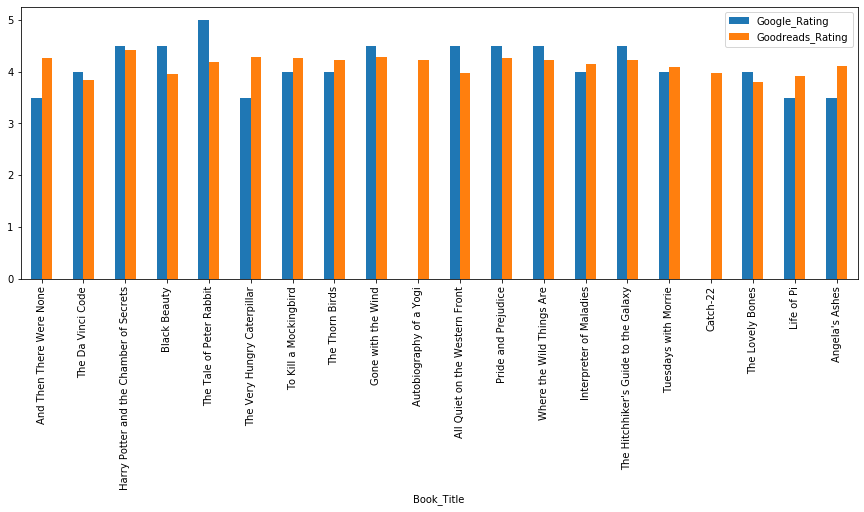

In [27]:
# Using the dataframe retrived from the INNER JOIN, compare the Google ratings with the Goodreads Rating for the books
Inner_df.plot(x="Book_Title", y=["Google_Rating", "Goodreads_Rating"], kind="bar", figsize=(15,5))
plt.show()

In [28]:
# Select data from the booksdb table for further visualization purposes
booksdb_df = pd.read_sql('SELECT * FROM booksdb', conn)
lendb_df = booksdb_df.shape[0]             # Calculate the number of rows in the database table

In [29]:
booksdb_df

,Book_Title,Author,Publisher,Published_Date,ISBN_10,ISBN_13,Page_Count,Average_Rating,Rating_Count,Sale_Country,Sale_Amount,Sale_Currency,Copies_Sold,Original_Language
0,A Tale of Two Cities,Charles Dickens,None,1902,0791092933,9780791092934,324.0,4.0,160.0,US,NaN,None,200 Million,English
1,The Little Prince,Antoine de Saint Exupery,Strelbytskyy Multimedia Publishing,2018-06-06,1938412478,9781938412479,NaN,5.0,1.0,US,0.43,USD,150 Million,French
2,And Then There Were None,Agatha Christie,HarperCollins UK,2003,0007136838,9780007136834,317.0,3.5,2.0,None,NaN,None,100 Million,English
3,Dream of the Red Chamber,Cao Xueqin,The Floating Press,2009-12-01,1775416747,9781775416746,2119.0,4.0,1.0,US,5.99,USD,100 Million,Chinese
4,"The Lion, the Witch and the Wardrobe",C S Lewis,HarperCollins,2002-04-16,0060082402,9780060082406,192.0,4.5,34.0,None,NaN,None,85 Million,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,The Gospel According to Peanuts,Robert L Short,Westminster John Knox Press,2000-01-01,0664222226,9780664222222,130.0,4.5,11.0,None,NaN,None,10 Million,English
134,Life of Pi,Yann Martel,Houghton Mifflin Harcourt,2002-06-04,0547416113,9780547416113,336.0,3.5,2808.0,US,9.99,USD,10 Million,English
135,The Giver,Lois Lowry,Houghton Mifflin Harcourt,2014-07-01,054434068X,9780544340688,240.0,4.0,3953.0,None,NaN,None,10 Million,English
136,Fahrenheit 451,Ray Bradbury,Dramatic Publishing,1986,0871293102,9780871293107,96.0,4.0,10.0,None,NaN,None,10 Million,English


In [30]:
# Normalize the data under Copies_Sold for our Visualization purposes
booksdb_df["Copies_Sold"]= booksdb_df["Copies_Sold"].str.split(" ", n = 1, expand = True)
booksdb_df["Copies_Sold"]= booksdb_df["Copies_Sold"].str.split("–", n = 1, expand = True)
for x in range(0, lendb_df - 1):
    if (booksdb_df["Copies_Sold"][x].find('>') != -1): 
        spl = booksdb_df["Copies_Sold"][x].split('>')
        booksdb_df["Copies_Sold"][x] = spl[1]
booksdb_df.Copies_Sold = pd.to_numeric(booksdb_df.Copies_Sold, errors='coerce')

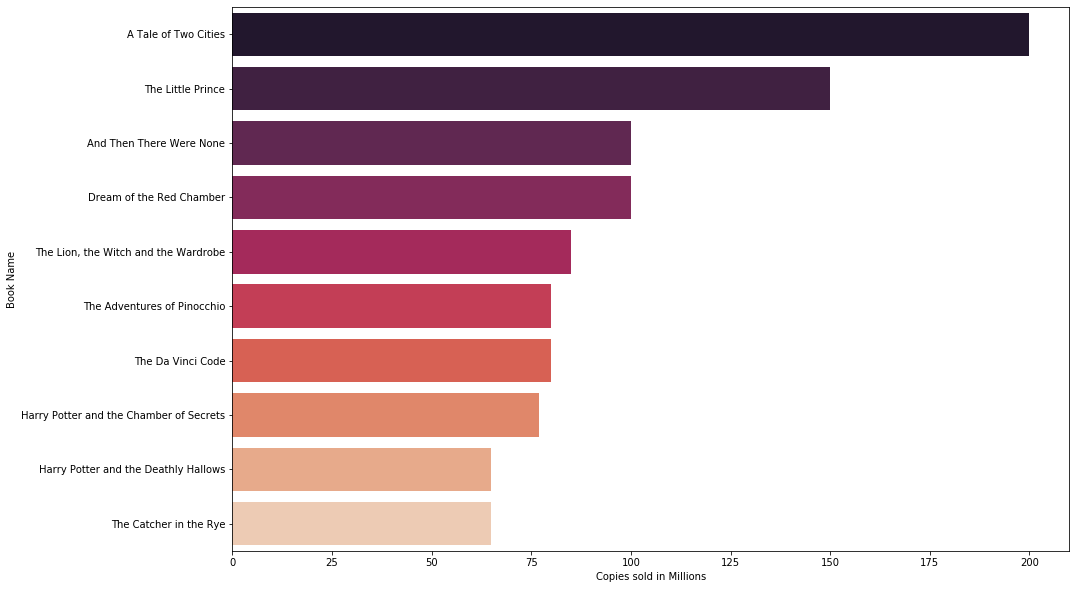

In [31]:
# Which are the top 10 most sold books?
most_copies_sold = booksdb_df.sort_values('Copies_Sold', ascending = False).head(10).set_index('Book_Title')
plt.figure(figsize=(15,10))
fig = sns.barplot(most_copies_sold['Copies_Sold'], most_copies_sold.index, palette='rocket')
fig.set(xlabel='Copies sold in Millions', ylabel='Book Name')
plt.show()

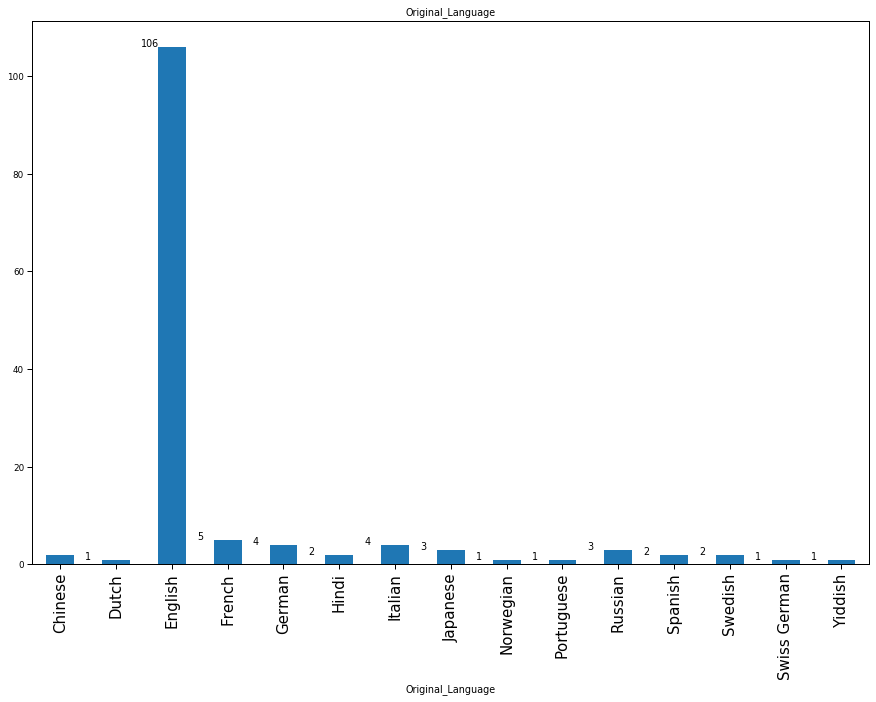

In [32]:
# What is the distribution of books for all languages?

sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = booksdb_df.groupby('Original_Language')['Book_Title'].count().plot.bar()
plt.title('Original_Language')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()))

In [33]:
# Who made the most sales in Dollar amount in USA?

# To answer this question, first we have to create a subset dataframe with only rows with Sale_Currency = 'USD'
usd_df = booksdb_df[booksdb_df['Sale_Currency'] == 'USD']
lenusd_df = usd_df.shape[0]             # Calculate the number of rows
usd_df = usd_df.reset_index()

# Once we have the new dataframe, add a new columnTotal_Sales to the dataframe which would be Sale_Amount * Copies_Sold
for x in range(0, lenusd_df - 1):
    usd_df['Total_Sales'] = usd_df['Sale_Amount'] * usd_df['Copies_Sold']
usd_df

,index,Book_Title,Author,Publisher,Published_Date,ISBN_10,ISBN_13,Page_Count,Average_Rating,Rating_Count,Sale_Country,Sale_Amount,Sale_Currency,Copies_Sold,Original_Language,Total_Sales
0,1,The Little Prince,Antoine de Saint Exupery,Strelbytskyy Multimedia Publishing,2018-06-06,1938412478,9781938412479,NaN,5.0,1.0,US,0.43,USD,150.0,French,64.500
1,3,Dream of the Red Chamber,Cao Xueqin,The Floating Press,2009-12-01,1775416747,9781775416746,2119.0,4.0,1.0,US,5.99,USD,100.0,Chinese,599.000
2,7,Harry Potter and the Chamber of Secrets,J K Rowling,Pottermore Publishing,2015-12-08,1781100500,9781781100509,341.0,4.5,2388.0,US,8.99,USD,77.0,English,692.230
3,13,The Alchemist,Paulo Coelho,HarperCollins,2015-02-24,0062416219,9780062416216,208.0,4.5,18.0,US,11.99,USD,65.0,Portuguese,779.350
4,17,Lolita,Vladimir Nabokov,Vintage,2010-08-24,0307744027,9780307744029,336.0,4.0,46.0,US,12.99,USD,50.0,English,649.500
5,23,Watership Down,Richard Adams,Simon and Schuster,2009-07-14,1439176124,9781439176122,496.0,4.5,299.0,US,13.99,USD,50.0,English,699.500
6,25,The Ginger Man,J P Donleavy,Open Road + Grove/Atlantic,2010-07-01,0802198163,9780802198167,368.0,3.5,10.0,US,9.99,USD,50.0,English,499.500
7,33,Sophie's World,Jostein Gaarder,"Farrar, Straus and Giroux",2007-03-20,1466804270,9781466804272,544.0,3.5,1820.0,US,9.99,USD,40.0,Norwegian,399.600
8,43,The Great Gatsby,F Scott Fitzgerald,Atlântico Press,2013-05-16,989855942X,9789898559425,190.0,NaN,NaN,US,14.10,USD,30.0,English,423.000
9,45,Rebecca,Daphne du Maurier,"Little, Brown",2013-12-17,0316323705,9780316323703,448.0,4.0,2793.0,US,10.99,USD,30.0,English,329.700


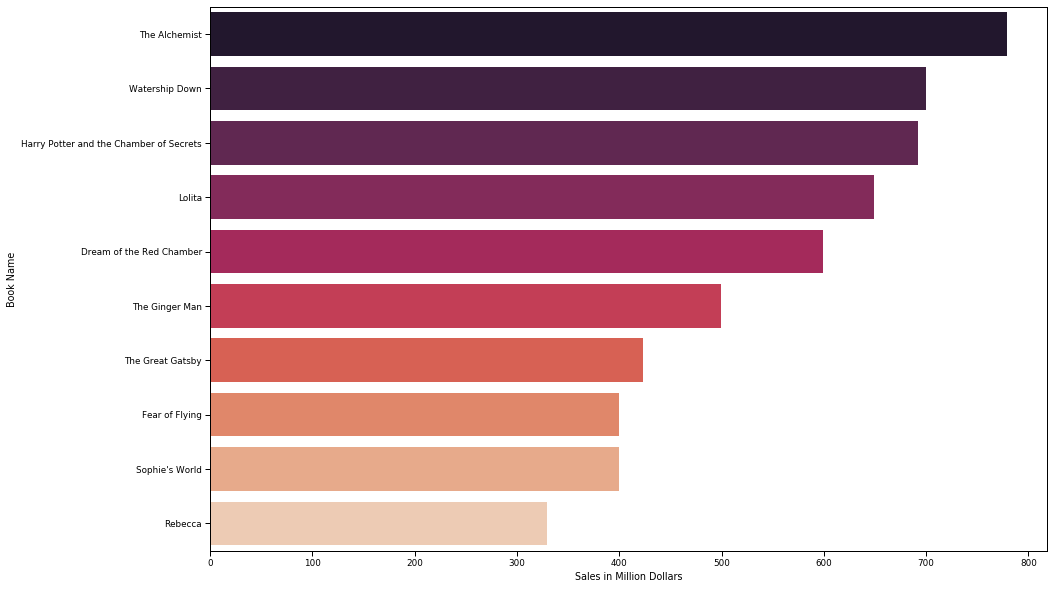

In [34]:
# Now we can plot the bar plot using the new column Total_Sales

most_money_sold = usd_df.sort_values('Total_Sales', ascending = False).head(10).set_index('Book_Title')
plt.figure(figsize=(15,10))
fig = sns.barplot(most_money_sold['Total_Sales'], most_money_sold.index, palette='rocket')
fig.set(xlabel='Sales in Million Dollars', ylabel='Book Name')
plt.show()

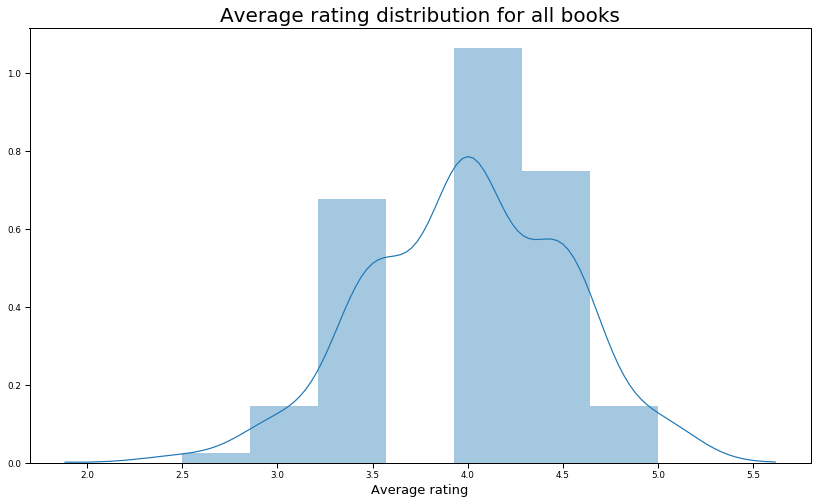

In [35]:
# Check the Average rating distribution for all books

dist = booksdb_df
dist.average_rating = dist.Average_Rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['Average_Rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)
plt.show()

As we can see overall average rating of most of the best selling books are around 4.0. 